This file contains the second experiment of the paper. Here, we illustrate that with Bernoulli distributions SW-LB-SDA performs better than all its competitor even if the algorithm does not know in advance that the distributions are Bernoulli.

# Loading the correct dependencies

In [1]:
import arms
import numpy as np
import matplotlib.pyplot as plt
from tracker import Tracker2, SWTracker, DiscountTracker
from MAB import GenericMAB as GMAB
%matplotlib inline  
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%load_ext autoreload
%load_ext memory_profiler
%autoreload 2
from utils import plot_mean_arms, traj_arms
marker_list = ["o","v","*","s"]
color_list = ['blue','red','orange', 'c', 'm', 'green']

# Bernoulli experiment with T=10000

In [2]:
arm_start, param_start = ['B', 'B', 'B'], [0.5, 0.3, 0.4]
chg_dist = {'3000': [['B', 'B', 'B'], [0.3, 0.7, 0.2]],
            '5000': [['B', 'B', 'B'], [0.5, 0.3, 0.6]]
           }

mab = GMAB(arm_start, param_start, chg_dist)


T = 10000
nb_change = 3
Gamma_T_garivier = nb_change - 1
reward_u_p = 1

# Exp3 tuning
gamma_EXP3 = min(1, np.sqrt(mab.nb_arms*(nb_change*np.log(mab.nb_arms*T)+np.exp(1))/((np.exp(1)-1)*T)))

# D-UCB tuning
gamma_D_UCB = 1 - 1/(4*reward_u_p)*np.sqrt(Gamma_T_garivier/T)

# SW-UCB tuning
tau_theorique = 2*reward_u_p*np.sqrt(T*np.log(T)/Gamma_T_garivier)
tau_no_log = 2*reward_u_p*np.sqrt(T/Gamma_T_garivier)

# CUSUM tuning
h_CUSUM = np.log(T/Gamma_T_garivier)
alpha_CUSUM = np.sqrt(Gamma_T_garivier/T*h_CUSUM)
M_CUSUM = 50
eps_CUSUM = 0.05

# M-UCB tuning
w_BRANO = 800
b_BRANO = np.sqrt(w_BRANO/2*np.log(2*len(arm_start)*T**2))
gamma_MUCB = np.sqrt(Gamma_T_garivier*np.log(T)*len(arm_start)/T)
delta_min = 0.2

In [3]:
N = 2000

reg_LBSDA = mab.MC_regret('LB_SDA', N, T, {'tau': int(tau_theorique)},store_step=1)
reg_EXP3S = mab.MC_regret("EXP3S", N, T, {'alpha':1/T, 'gamma': gamma_EXP3},store_step=1)
reg_CUSUM = mab.MC_regret('CUSUM', N, T, {'alpha':alpha_CUSUM , 'h': h_CUSUM, 'M':M_CUSUM, 'eps':eps_CUSUM, 'ksi':1/2},store_step=1)
reg_MUCB = mab.MC_regret('M_UCB', N, T, {'w':w_BRANO, 'b':b_BRANO, 'gamma':gamma_MUCB},store_step=1)
reg_DTS = mab.MC_regret('DTS', N, T, {'gamma': gamma_D_UCB},store_step=1)
reg_SWTS = mab.MC_regret('SW_TS', N, T, {'tau': int(tau_theorique)},store_step=1)

reg_SWklUCB = mab.MC_regret('SW_klUCB', N, T, {'tau': int(tau_theorique)},store_step=1)
reg_DklUCB = mab.MC_regret('D_klUCB', N, T, {'gamma': gamma_D_UCB},store_step=1)


Computing 2000 simulations: 100%|██████████| 2000/2000 [13:56<00:00,  2.39it/s]


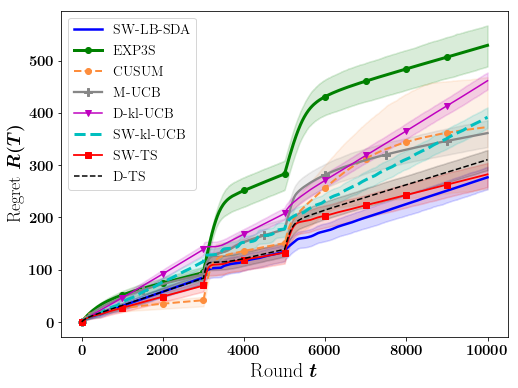

In [6]:
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc("lines", linewidth=3)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('font', weight='bold')
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath} \boldmath"]


t_saved = [i for i in range(T)]

    
plt.figure(figsize=(8,6))


plt.plot(reg_LBSDA[0], color = "blue",  linewidth=2.5, label= "SW-LB-SDA")
plt.fill_between(t_saved, np.quantile(reg_LBSDA[1], q= 0.25, axis=1), 
                 np.quantile(reg_LBSDA[1], q= 0.75, axis=1), color = "blue",  linewidth=1.5, alpha=0.15)

plt.plot(reg_EXP3S[0], color = "green",marker = 'o', markevery= 1000, label = 'EXP3S')
plt.fill_between(t_saved, np.quantile(reg_EXP3S[1], q= 0.25, axis=1), 
                 np.quantile(reg_EXP3S[1], q= 0.75, axis=1), color = "green",  linewidth=1.5, alpha=0.15)

plt.plot(reg_CUSUM[0], color = "#fd8d3c", linewidth = 2, linestyle="--", marker='o', markevery= 1000, label = 'CUSUM')
plt.fill_between(t_saved, np.quantile(reg_CUSUM[1], q= 0.25, axis=1), 
                 np.quantile(reg_CUSUM[1], q= 0.75, axis=1), color = "#fd8d3c",  linewidth=1.5, alpha=0.12)

plt.plot(reg_MUCB[0], color = "#878787", linewidth = 2.3,  marker='P', markevery= 1500, markersize = 8,
         label = 'M-UCB')
plt.fill_between(t_saved, np.quantile(reg_MUCB[1], q= 0.25, axis=1), 
                 np.quantile(reg_MUCB[1], q= 0.75, axis=1), color = "#878787",  linewidth=1.5, alpha=0.15)

plt.plot(reg_DklUCB[0], color = "m", marker= "v", linewidth = 1.5, markevery=1000, label = 'D-kl-UCB')
plt.fill_between(t_saved, np.quantile(reg_DklUCB[1], q= 0.25, axis=1), 
                 np.quantile(reg_DklUCB[1], q= 0.75, axis=1), color = "m",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SWklUCB[0], color = "c", linestyle = "--", markevery=1000,label= "SW-kl-UCB")
plt.fill_between(t_saved, np.quantile(reg_SWklUCB[1], q= 0.25, axis=1), 
                 np.quantile(reg_SWklUCB[1], q= 0.75, axis=1), color = "c",  linewidth=1.5, alpha=0.15)

plt.plot(reg_SWTS[0], color = "red",  linewidth = 1.8, 
         linestyle = "-", marker = 's', markevery=1000,label= "SW-TS")
plt.fill_between(t_saved, np.quantile(reg_SWTS[1], q= 0.25, axis=1), 
                 np.quantile(reg_SWTS[1], q= 0.75, axis=1), color = "red",  linewidth=1.5, alpha=0.15)

plt.plot(reg_DTS[0], color = "black", linewidth = 1.5, linestyle="--",label= "D-TS")
plt.fill_between(t_saved, np.quantile(reg_DTS[1], q= 0.25, axis=1), 
                 np.quantile(reg_DTS[1], q= 0.75, axis=1), color = "black",  linewidth=1.5, alpha=0.15)


    
plt.legend(loc=2, fontsize=14).draw_frame(True)
plt.xlabel(r'Round $\boldsymbol{t}$', fontsize=20)
plt.ylabel(r'Regret $\boldsymbol{R(T)}$', fontsize=18)


#plt.show()
plt.savefig('final_bernoulli.png', dpi = 200, bbox_inches='tight')